# Projet NLP

In [ ]:
pip install unidecode

     |████████████████████████████████| 245kB 4.2MB/s 


In [ ]:
# Import packages
import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd
import re
import pickle
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode

## Scrapping Part
Ici on scrappe les commentaires sur ***Apple iPhone X 64Go Gris Sidéral (Reconditionné)*** disponible [Ici](https://www.amazon.fr/Apple-iPhone-Sid%C3%A9ral-Reconditionn%C3%A9-Certifi%C3%A9/dp/B07985C44N/ref=cm_cr_arp_d_product_top?ie=UTF8). Pour récuperer les commentaires, j'ai utilisé ceux avec 5 étoiles pour les positifs et 1 étoile pour les négatifs.


In [ ]:
# Constants
BASE_URL_ONE_STAR='https://www.amazon.fr/product-reviews/B07985C44N/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&filterByStar=one_star&reviewerType=all_reviews&pageNumber={}' 
BASE_URL_FIVE_STARS='https://www.amazon.fr/product-reviews/B07985C44N/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews&pageNumber={}' 
HEAD={
"Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
"User-Agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"} 

In [ ]:
def get_comments(base_url, selector):
  """
  Get the comments for the given base url and the class selector
  """
  comments=[]
  for page in range(0, 25):
    # Pause entre 0.5 et 1.5 s
    time.sleep(random.uniform(0.5,1.5))
    url = base_url.format(page)
    r=requests.get(url,headers=head)
    #print(url, r.status_code)
    soup=BeautifulSoup(r.content)

    for elem in soup.findAll('i',attrs={"class":selector}):
      comment = elem.find_next('div').find_next('div').text
      comment = comment.replace('\n\n  ', '').replace('\n\n', '')
      comments.append(comment)
  return comments

#### Commentaires Négatifs

In [ ]:
negative_comments = get_comments(BASE_URL_ONE_STAR, 'a-icon a-icon-star a-star-1 review-rating')

In [ ]:
negative_comments[0:101]

['Le téléphone est bloqué iTunes',
 'Le téléphone est bloqué iTunes',
 "L'écran affichant des lignes blanches et noires, je l'ai emmené à l'apple store ou ils ont diagnostiqué qu'il ne s'agissait pas d'un IPhone reconditionné mais d'une contrefaçon, la réparation étant donc impossible :l’écran n’était pas d’origine, il est contrefait.Écran lcd et non pas oled avec des puces équivalentes, et des filtres Face ID collés.Le boîtier n’est également pas apple, les finitions sont bonnes mais le boîtier est bien contrefait.Et une étiquette chinoise collé sur la camera en interne.",
 'Globallement satisfaisant mais reconnaissance faciale ne fonctionne pas',
 'Téléphone reçu en superbe état sauf que je suis aller chez Apple store et il mon dit que mon écran d’iPhone n’était pas un écran oled mais bien un lcd de plus la face arrière de l’iPhone n’est pas non plus celle d’origine c’est une contrefaçon  je suis vraiment consterner par cela étant donner le prixJe ne suis pas du tout satisfait de mon

#### Commentaires Positifs

In [ ]:
positive_comments = get_comments(BASE_URL_FIVE_STARS, 'a-icon a-icon-star a-star-5 review-rating')

In [ ]:
positive_comments[0:101]

['Produit reconditionné MAIS vendu comme tel.Aucunes rayures extérieures, fonctionne parfaitement et le tout garantie Apple CARE pendant 10mois. Seul bémol pas de kit piéton et chargeur non OEM. Mais à ce prix (750e le 256gb) on va pas se plaindre',
 'Vraiment très satisfaite de cet iPhone reconditionnéReçu bien emballé avec un verre trempé !Il y a aucunes rayures, il est comme neufJe recommande !',
 'Vendeur proactif, livraison très rapide, produit conforme à la description. Une vraie bonne affaire à saisir. Je recommande !',
 'Cela fais maintenant plusieurs jours que je teste le produit et je suis très satisfaite. J’avais un peu d’appréhension vu la plupart des commentaires mais le téléphone est nickel , esthétiquement et intérieurement.La batterie tient très bien, le téléphone reçu comme neuf , tout marche merveilleusement bien. Le téléphone à été reçu dans les temps avec chargeur uniquement. C’est le seul petit problème que j’ai trouver, ce serait bien de livrer des écouteurs avec.

## Création d'un Data Frame

In [ ]:
values=[]
values.extend([1]*100)
values.extend([0]*100)

comments = []
comments.extend(positive_comments[0:100])
comments.extend(negative_comments[0:100])

In [ ]:
df = pd.DataFrame({'commentaire': comments, 'label': values})

In [ ]:
df.head(10)

,commentaire,label
0,Produit reconditionné MAIS vendu comme tel.Auc...,1
1,Vraiment très satisfaite de cet iPhone recondi...,1
2,"Vendeur proactif, livraison très rapide, produ...",1
3,Cela fais maintenant plusieurs jours que je te...,1
4,Quelques rayures visibles quand on regarde de ...,1
5,Super ! Vendeur suprême mobile FR est super .i...,1
6,Au vu des commentaires j’ai eu très peur ! J’a...,1
7,"iPhone X 256 Go reconditionee oui c’est vrai ,...",1
8,Amazon m’avait donné mardi 14 comme date de li...,1
9,Je ne regrette absolument pas cet achat ! Le t...,1


In [ ]:
df.tail(10)

,commentaire,label
190,Après un premier téléphone défectueux commandé...,0
191,Cet iphone n'est pas un modèle européen.C'est ...,0
192,pas conforme,0
193,Rayures visibleBatterie se décharge rapidement...,0
194,La batterie diminue hyper vite l’état de la ba...,0
195,Micro qui ne fonctionne pas . Comment peut-on ...,0
196,"Téléphone reçu sans problème mais problèmes , ...",0
197,Le táctil de l’Écran ne fonctionne pas,0
198,Bonjour je suis pas satisfait de mon achatL’iP...,0
199,Le téléphone est bloqué iTunes,0


## Export to CSV

In [ ]:
df.to_csv('Amazon_Comments.csv', index=False)

### Pré-processing

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))
stop_words.remove('pas')
stop_words.remove('ne')
def nettoyage(texte):
    tmp=[]
    # Normalisation : accents et minuscule
    texte=unidecode(texte.lower())
    p='[a-z]{2,}'
    for mot in re.findall(p,texte):
        if mot in stop_words:
            continue
        else:
            tmp.append(mot)
    return ' '.join(tmp)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_clean = df
df_clean['commentaire'] = df_clean['commentaire'].apply(nettoyage)

In [ ]:
df_clean.head(5)

,commentaire,label
0,produit reconditionne vendu comme tel aucunes ...,1
1,vraiment tres satisfaite cet iphone reconditio...,1
2,vendeur proactif livraison tres rapide produit...,1
3,cela fais maintenant plusieurs jours teste pro...,1
4,quelques rayures visibles quand regarde pres b...,1


In [ ]:
df.tail(5)

,commentaire,label
195,micro ne fonctionne pas comment peut vendre ar...,0
196,telephone recu sans probleme problemes bug tou...,0
197,tactil ecran ne fonctionne pas,0
198,bonjour pas satisfait achatl iphone go problem...,0
199,telephone bloque itunes,0


In [ ]:
positif=df_clean[df_clean['label'] == 1]['commentaire']
negatif=df_clean[df_clean['label'] == 0]['commentaire']

## Featurisation

#### TFIDF


- On applique l'analyse TFIDF pour la numérisation. `ngram_range` J'ai choisi la valueur (1, 2) car lors de l'analyse des commentaires, j'ai observé que l'avis peut se résumer en un seul mot par exemple **Abimé** mais dans certais cas on ajoute des adverbes comme **horriblement abimé**. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df_clean['commentaire'])
print(vectorizer.get_feature_names())
print(X.shape)
df_tfidf=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_tfidf.head()

['abime', 'abime comprend', 'abime ne', 'abimee', 'abimee franchement', 'absolument', 'absolument pas', 'accessoire', 'accessoire pas', 'accessoirement', 'accessoirement telephone', 'accessoires', 'accessoires ajoutes', 'accessoires compris', 'accessoires etaient', 'achat', 'achat bon', 'achat iphone', 'achat meme', 'achat pas', 'achat portable', 'achat prix', 'achat super', 'achat telephone', 'achat vitre', 'achat vraiment', 'achatje', 'achatje souhaite', 'achatl', 'achatl iphone', 'achetant', 'achetant iphone', 'achete', 'achete chez', 'achete iphone', 'achete juillet', 'achete marche', 'achete neuf', 'achete occasion', 'achete octobre', 'achete phone', 'achete suite', 'achete telephone', 'acheter', 'acheter donc', 'acheter iphone', 'acheter leurs', 'acheter nouveau', 'acheter pas', 'acheter tel', 'acheter telephone', 'acheteur', 'acheteur telephone', 'acheteurs', 'acheteurs tracer', 'achetez', 'achetez surtout', 'activationmerci', 'activationmerci faire', 'adaptateur', 'adaptateur c

,abime,abime comprend,abime ne,abimee,abimee franchement,absolument,absolument pas,accessoire,accessoire pas,accessoirement,accessoirement telephone,accessoires,accessoires ajoutes,accessoires compris,accessoires etaient,achat,achat bon,achat iphone,achat meme,achat pas,achat portable,achat prix,achat super,achat telephone,achat vitre,achat vraiment,achatje,achatje souhaite,achatl,achatl iphone,achetant,achetant iphone,achete,achete chez,achete iphone,achete juillet,achete marche,achete neuf,achete occasion,achete octobre,...,vraiment contente,vraiment decu,vraiment eviter,vraiment inadmissible,vraiment lege,vraiment leger,vraiment pas,vraiment plaisant,vraiment rien,vraiment tres,vraiment triste,vraimment,vraimment cette,vu,vu agit,vu commentaires,vu lu,vu plupart,vu prix,vue,vue commentaires,web,web plante,wifi,wifi vice,wireless,wireless verizon,xmax,xmax tous,ya,ya limites,yeux,yeux fermes,your,your browser,zealand,zealand china,zero,zero enleve,zero pointe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211195,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.098103,0.0,0.0,0.0,0.120884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Word2Vec

Pour les hyper paramètres j'ai opté pour : 
- window de 10 : Il répresente la fenêtre avant et après chaque mot pour avoir du contexte en gardant en mémoire la compréhension des items postérieurs à 10 items et anterieurs à 10 items aussi.
- size de 100 : j'ai choisi d'avoir 100 vecteurs, je suis partie de l'hypothèse de mettre plus de vecteurs que de mots uniques existants, qui sont de 65 mots.
- min_count de 3 : J'ai choisi d'ignorer le mot s'il apprait moins de trois fois dans le corpus.
- Workers  de 4 : Pour accélérer l'entrainement du modèle.

In [ ]:
corpus = [phrase.split() for phrase in df_clean['commentaire']]

WORD2_VEC_DIMENSION = 100
from gensim.models import Word2Vec
w2vModel = Word2Vec(sentences=corpus, window=10, min_count=3, workers=4, size=WORD2_VEC_DIMENSION)
w2vModel.save("word2vec.model")

In [ ]:
w2vModel.wv.vocab

{'accessoires': <gensim.models.keyedvectors.Vocab at 0x7fecc6292090>,
 'achat': <gensim.models.keyedvectors.Vocab at 0x7fec24f2a3d0>,
 'achete': <gensim.models.keyedvectors.Vocab at 0x7fec24f2ae90>,
 'acheter': <gensim.models.keyedvectors.Vocab at 0x7fecc62920d0>,
 'adaptateur': <gensim.models.keyedvectors.Vocab at 0x7fec260618d0>,
 'affaire': <gensim.models.keyedvectors.Vocab at 0x7fec24eded10>,
 'ailleurs': <gensim.models.keyedvectors.Vocab at 0x7fec24f0a950>,
 'aller': <gensim.models.keyedvectors.Vocab at 0x7fec24f2a290>,
 'allez': <gensim.models.keyedvectors.Vocab at 0x7fec24f0a510>,
 'allume': <gensim.models.keyedvectors.Vocab at 0x7fecc6292150>,
 'alors': <gensim.models.keyedvectors.Vocab at 0x7fec24f1d6d0>,
 'amazon': <gensim.models.keyedvectors.Vocab at 0x7fec25484890>,
 'an': <gensim.models.keyedvectors.Vocab at 0x7fec24f2a150>,
 'appareil': <gensim.models.keyedvectors.Vocab at 0x7fec24f1d4d0>,
 'appel': <gensim.models.keyedvectors.Vocab at 0x7fecc628dc90>,
 'appels': <gensim.

In [ ]:
w2vModel.wv.vectors.shape

(338, 100)

#### BERT

In [ ]:
pip install transformers==3.3.1

     |████████████████████████████████| 1.1MB 4.3MB/s 
     |████████████████████████████████| 1.2MB 39.0MB/s 
     |████████████████████████████████| 3.0MB 41.4MB/s 
     |████████████████████████████████| 901kB 25.4MB/s 


In [ ]:
from transformers import pipeline
import torch
from transformers import CamembertTokenizer

In [ ]:
tokenizer = CamembertTokenizer.from_pretrained('camembert-base', return_token_type_ids=True, add_special_tokens=True)
encoded_batch = tokenizer.batch_encode_plus(df_clean['commentaire'].values.tolist(),
                                            add_special_tokens=True, 
                                            padding=True,
                                            return_tensors="pt")

In [ ]:
encoded_batch['input_ids'].shape

torch.Size([200, 84])

In [ ]:
encoded_batch['input_ids']

tensor([[    5,   501,   343,  ...,     1,     1,     1],
        [    5,   302,  2812,  ...,     1,     1,     1],
        [    5,  4889,   909,  ...,     1,     1,     1],
        ...,
        [    5,   271,  6852,  ...,     1,     1,     1],
        [    5,  5061,    34,  ...,     1,     1,     1],
        [    5, 18207, 11249,  ...,     1,     1,     1]])

## Modeling

Dans cette section, j'ai implémenté la classification. Pour ce faire, j'ai opté pour un classifieur de type Logistic Regression pour le TDIDF et BERT. Pour ce qui concerne Word2Vec, j'ai voulu utilisé le LSTM. 

Les métriques proposées sont :

- Classification Report
- Matrice de Confusion

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
import matplotlib.pyplot as plt
import numpy as np


def show_confusion_matrix(y_pred, y_test):
    """
    Shows the confusion matrix for the given y_pred and y_test
    Parameters:
    y_pred -- the predicated classes 
    y_test -- the real classes
    """
    cm=confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest',cmap='Blues')
    plt.title("Matrice de confusion")
    plt.colorbar() 
    labels=df_clean['label'].unique()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > ( cm.max() / 2) else "black")
    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.show()

def show_classification_report(y_pred, y_test):
    """
    Shows the classification report
    Parameters:
    y_pred -- the predicted labels 
    y_test -- the real labels
    """
    report = classification_report(y_test, y_pred)
    print(report)

### TFDF

In [ ]:
df_tfidf.head(2)

,abime,abime comprend,abime ne,abimee,abimee franchement,absolument,absolument pas,accessoire,accessoire pas,accessoirement,accessoirement telephone,accessoires,accessoires ajoutes,accessoires compris,accessoires etaient,achat,achat bon,achat iphone,achat meme,achat pas,achat portable,achat prix,achat super,achat telephone,achat vitre,achat vraiment,achatje,achatje souhaite,achatl,achatl iphone,achetant,achetant iphone,achete,achete chez,achete iphone,achete juillet,achete marche,achete neuf,achete occasion,achete octobre,...,vraiment contente,vraiment decu,vraiment eviter,vraiment inadmissible,vraiment lege,vraiment leger,vraiment pas,vraiment plaisant,vraiment rien,vraiment tres,vraiment triste,vraimment,vraimment cette,vu,vu agit,vu commentaires,vu lu,vu plupart,vu prix,vue,vue commentaires,web,web plante,wifi,wifi vice,wireless,wireless verizon,xmax,xmax tous,ya,ya limites,yeux,yeux fermes,your,your browser,zealand,zealand china,zero,zero enleve,zero pointe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_data=df_tfidf
Y_data=df_clean['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=42)

#### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
print(f'Accuracy on Train is: {clf.score(X_train, y_train)}')

Accuracy on Train is: 1.0


#### Evaluation

Accuracy on Test is: 0.9166666666666666

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        31

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



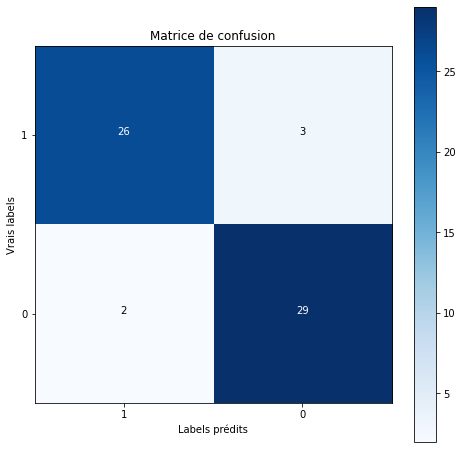

In [ ]:
print(f'Accuracy on Test is: {clf.score(X_test, y_test)}\n')
y_pred=clf.predict(X_test)
show_classification_report(y_pred, y_test)
show_confusion_matrix(y_pred,y_test)

### Word2Vec

#### LSTM

In [ ]:
number_of_word=df_clean['commentaire'].apply(lambda phrase:len(phrase.split(' ')))
number_of_word

0      29
1      15
2      13
3      43
4      23
       ..
195    14
196    16
197     5
198    10
199     3
Name: commentaire, Length: 200, dtype: int64

In [ ]:
max_len = 0
for words_per_sentence in corpus:
  max_len = np.max([max_len, len(words_per_sentence)])

print(f'Max Lenght of Sentences is {max_len}')

Max Lenght of Sentences is 65


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM
from keras.optimizers import Adam

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
tokenized_corpus = tokenizer.texts_to_sequences(corpus)
x = pad_sequences(tokenized_corpus, maxlen = max_len)

In [ ]:
x

array([[   0,    0,    0, ...,  128,    1,  345],
       [   0,    0,    0, ...,   15,  347,   23],
       [   0,    0,    0, ...,  195,  350,   23],
       ...,
       [   0,    0,    0, ...,    4,   17,    1],
       [   0,    0,    0, ..., 1158,   56, 1159],
       [   0,    0,    0, ...,    2,   48,   57]], dtype=int32)

In [ ]:
X_data=x
Y_data=df_clean['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=42)

In [ ]:
X_data.shape[1]

65

In [ ]:
def get_weight_matrix(model, vocab):
    """
    Permet de construire la Matrice des poids on utisant notre copus et le model Word2vec. Le resultat sera utilisé dans le modèle LSTM.
    """
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, WORD2_VEC_DIMENSION))
    for word, i in vocab.items():
      if word in model:
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2vModel, tokenizer.word_index) 

# Créer Embedded Layer utilisant le Word2Vec
n_unique_words = len(set(tokenizer.word_index)) + 1 
embedding_layer = Embedding(n_unique_words, output_dim=WORD2_VEC_DIMENSION, weights=[embedding_vectors], 
                            input_length=X_data.shape[1])
model = Sequential([embedding_layer])   

lstm_1 = LSTM(units=64)
model.add(lstm_1)
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 65, 100)           116000    
_________________________________________________________________
lstm_19 (LSTM)               (None, 64)                42240     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 158,305
Trainable params: 158,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
5/5 [==============================] - 3s 195ms/step - loss: 0.6934 - accuracy: 0.5115 - val_loss: 0.6912 - val_accuracy: 0.5167
Epoch 2/30
5/5 [==============================] - 0s 51ms/step - loss: 0.6833 - accuracy: 0.5403 - val_loss: 0.6881 - val_accuracy: 0.5333
Epoch 3/30
5/5 [==============================] - 0s 56ms/step - loss: 0.6676 - accuracy: 0.7218 - val_loss: 0.6818 - val_accuracy: 0.5167
Epoch 4/30
5/5 [==============================] - 0s 55ms/step - loss: 0.6322 - accuracy: 0.8851 - val_loss: 0.6726 - val_accuracy: 0.5333
Epoch 5/30
5/5 [==============================] - 0s 50ms/step - loss: 0.5525 - accuracy: 0.9072 - val_loss: 0.6625 - val_accuracy: 0.5833
Epoch 6/30
5/5 [==============================] - 0s 52ms/step - loss: 0.4321 - accuracy: 0.8729 - val_loss: 0.6934 - val_accuracy: 0.6500
Epoch 7/30
5/5 [==============================] - 0s 51ms/step - loss: 0.3146 - accuracy: 0.9540 - val_loss: 0.5804 - val_accuracy: 0.7000
Epoch 8/30
5/5 [==========

In [ ]:
def plot_graphs(history, string):
  plt.figure(figsize=(8, 8))
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.grid()
  plt.show()

<Figure size 576x576 with 0 Axes>

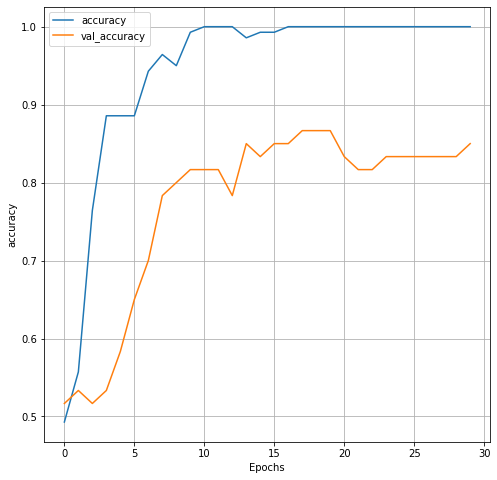

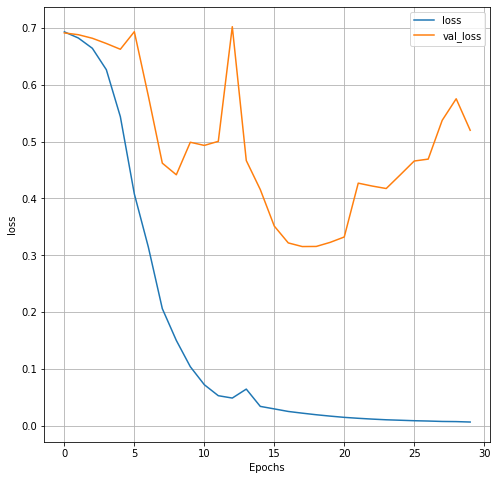

In [ ]:
plt.figure(figsize = (8,8))
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#### Evaluation

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.82      0.90      0.86        31

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



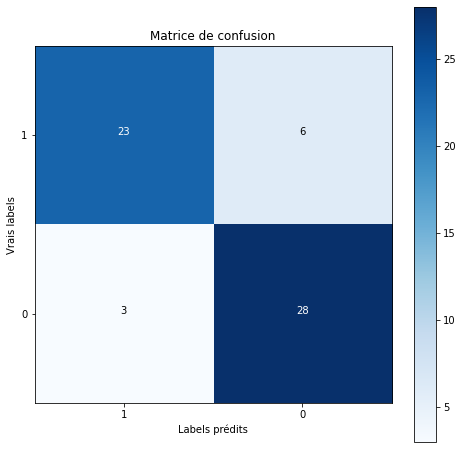

In [ ]:
# La méthode pour prédire lors de l'utilisation des réseaux de neurones est 'predict_classes'
y_pred=model.predict_classes(X_test)
show_classification_report(y_pred, y_test)
show_confusion_matrix(y_pred,y_test)

### BERT

In [ ]:
 encoded_batch['input_ids'].shape

torch.Size([200, 84])

In [ ]:
sentiments = torch.tensor(df_clean['label'])
sentiments

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_data= pd.DataFrame(encoded_batch['input_ids'].numpy())
Y_data=df_clean['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
print(f'Accuracy on Train is: {clf.score(X_train, y_train)}')

Accuracy on Train is: 0.9071428571428571


#### Evaluation

Accuracy on Test is: 0.6166666666666667

              precision    recall  f1-score   support

           0       0.62      0.55      0.58        29
           1       0.62      0.68      0.65        31

    accuracy                           0.62        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.62      0.62      0.62        60



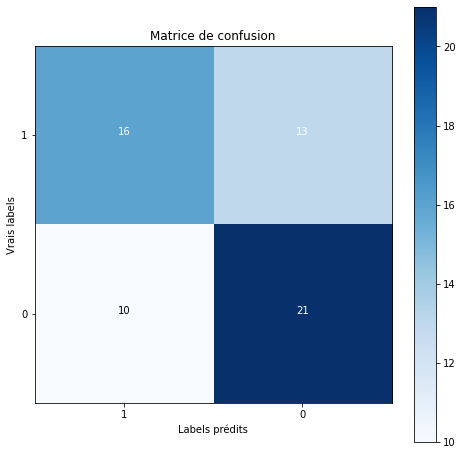

In [ ]:
print(f'Accuracy on Test is: {clf.score(X_test, y_test)}\n')
y_pred=clf.predict(X_test)
show_classification_report(y_pred, y_test)
show_confusion_matrix(y_pred,y_test)

### Tableau Comparatif

|  Featurisation et Modèle           | Accuracy sur Test      |
| ------------- ---------------------|-------------- ---------|
| TFIDF avec Logistic Regression     | 91.66%                 |
| Word2Vec avec LSTM                 | 90%                    |
| BERT avec Logistic Regression      | 61%                    |





## En analysant les différentes métriques en plus de l'accuracy, on observe que la featurisation avec TFIDF et Word2vec donne de très bons résultats avec une accuracy de 90%, avec un taux de faux positifs/négatifs faible. Pour ce qui concerne BERT, l'accuracy n'est pas optimale. Ceci peut être dû au classifieur binaire choisi.  Une voie à explorer est l'utilisation du classifieur BERT *CamembertForSequenceClassification* 